<a href="https://colab.research.google.com/github/WillSAdkins/MSc_project_EEG/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
import string
import numpy as np
#!pip install tensorflow
#import tensorflow as tf
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
# !pip install keras
from keras.models import Sequential,load_model
from keras.layers import Dense, advanced_activations, Dropout, LSTM, GRU, Embedding, SimpleRNN, Conv2D, Flatten
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder
!pip install tqdm
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import glob
#import cv2
import gc
!pip install mne
import mne
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time
import pickle
from mne.preprocessing import create_ecg_epochs
from scipy.interpolate import Rbf


def save_model_json(model, filename):
    # serialize model to JSON
    model_json = model.to_json()
    with open(f"{filename}.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(f"{filename}.h5")
    print(f"Saved {filename} to disk")



def load_model_json(filename):
    # load json and create model
    json_file = open(f'{filename}.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(f"{filename}.h5")
    print(f"Loaded {filename} from disk")
    return loaded_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Handle data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dir_path = "/content/drive/MyDrive/Bath/Dissertation/Analysis/Participants/"
participant = 'Will Adkins'
with ZipFile(dir_path + participant + '/' + 'recordings.zip', 'r') as zip_file:
    print(zip_file)
    print(zip_file.printdir())
    zip_file.extractall()

speaking1 = pd.read_csv('Labelled/speaking1_labelled.csv')
speaking2 = pd.read_csv('Labelled/speaking2_labelled.csv')
speaking3 = pd.read_csv('Labelled/speaking3_labelled.csv')
speaking4 = pd.read_csv('Labelled/speaking4_labelled.csv')
speaking5 = pd.read_csv('Labelled/speaking5_labelled.csv')
speaking6 = pd.read_csv('Labelled/speaking6_labelled.csv')
speaking7 = pd.read_csv('Labelled/speaking7_labelled.csv')
speaking8 = pd.read_csv('Labelled/speaking8_labelled.csv')
speaking9 = pd.read_csv('Labelled/speaking9_labelled.csv')
speaking10 = pd.read_csv('Labelled/speaking10_labelled.csv')
stimuli = pd.read_csv('Labelled/stimuli_labelled.csv')

<zipfile.ZipFile filename='/content/drive/MyDrive/Bath/Dissertation/Analysis/Participants/Will Adkins/recordings.zip' mode='r'>
File Name                                             Modified             Size
Labelled/speaking1_labelled.csv                2022-08-16 21:21:12     15114626
Labelled/speaking10_labelled.csv               2022-08-16 21:30:14     15179879
Labelled/speaking2_labelled.csv                2022-08-16 21:21:26     15110768
Labelled/speaking3_labelled.csv                2022-08-16 21:28:48     15115698
Labelled/speaking4_labelled.csv                2022-08-16 21:28:58     15114684
Labelled/speaking5_labelled.csv                2022-08-16 21:29:12     15115122
Labelled/speaking6_labelled.csv                2022-08-16 21:29:26     15114730
Labelled/speaking7_labelled.csv                2022-08-16 21:29:36     15113094
Labelled/speaking8_labelled.csv                2022-08-16 21:29:48     15111734
Labelled/speaking9_labelled.csv                2022-08-16 21:30:04     1

In [4]:
speaking1

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
0        23.000000      0  4111.538574  4232.948730  4218.717773  4237.948730   
1        23.003906      0  4226.025879  4236.538574  4243.589844  4228.717773   
2        23.007812      0  4247.948730  4230.897461  4240.128418  4240.256348   
3        23.011719      0  4249.743652  4271.282227  4243.974121  4212.436035   
4        23.015625      0  4251.922852  4218.461426  4234.871582  4247.307617   
...            ...    ...          ...          ...          ...          ...   
66555  4485.980469    129  4226.153809  4245.256348  4246.410156  4237.307617   
66556  4485.984375    129  4250.256348  4259.230957  4297.948730  4259.615234   
66557  4485.988281    129  4302.307617  4258.461426  4252.820313  4216.025879   
66558  4485.992188    129  4251.922852  4215.897461  4236.153809  4228.717773   
66559  4485.996094    129  4237.307617  4233.205078  4256.153809  4258.461426   

                T7           P7           O1           O2  ...           T8  \
0      4243.717773  4230.641113  4230.384766  4173.077148  ...  4207.692383   
1      4232.436035  4200.512695  4238.077148  4205.897461  ...  4233.974121   
2      4238.846191  4207.692383  4222.307617  4234.487305  ...  4245.769043   
3      4227.051270  4239.871582  4248.333496  4251.025879  ...  4243.077148   
4      4252.948730  4256.282227  4117.820313  4248.974121  ...  4258.205078   
...            ...          ...          ...          ...  ...          ...   
66555  4291.666504  4260.128418  4248.077148  4208.461426  ...  4223.461426   
66556  4252.051270  4212.948730  4239.871582  4222.563965  ...  4252.948730   
66557  4237.436035  4224.487305  4253.589844  4253.077148  ...  4234.871582   
66558  4255.769043  4255.128418  4286.922852  4233.589844  ...  4248.333496   
66559  4294.871582  4231.410156  4236.025879  4248.333496  ...  4260.384766   

                F8          AF4          FC6           F4   Channel 15  \
0      4225.000000  4238.461426  4236.410156  4243.077148  4103.846191   
1      4237.563965  4242.692383  4101.282227  4230.384766  4238.717773   
2      4104.487305  4235.512695  4251.410156  4246.282227  4255.256348   
3      4258.846191  4253.974121  4262.051270  4243.461426  4256.025879   
4      4265.128418  4246.922852  4255.897461  4254.487305  4259.358887   
...            ...          ...          ...          ...          ...   
66555  4247.692383  4254.358887  4283.589844  4229.230957  4227.436035   
66556  4282.820313  4233.333496  4228.974121  4250.384766  4251.666504   
66557  4231.282227  4249.615234  4250.128418  4283.205078  4303.461426   
66558  4247.820313  4276.922852  4302.051270  4260.641113  4251.025879   
66559  4300.641113  4261.410156  4251.538574  4210.769043  4240.641113   

        Channel 16  Label Mode of Stimulus      Stage  
0      4229.871582   Lamp            audio  speaking1  
1      4239.487305   Lamp            audio  speaking1  
2      4236.794922   Lamp            audio  speaking1  
3      4276.922852   Lamp            audio  speaking1  
4      4224.102539   Lamp            audio  speaking1  
...            ...    ...              ...        ...  
66555  4248.846191  Clock             text  speaking1  
66556  4276.794922  Clock             text  speaking1  
66557  4258.846191  Clock             text  speaking1  
66558  4213.333496  Clock             text  speaking1  
66559  4236.538574  Clock             text  speaking1  

[66560 rows x 21 columns]

In [5]:
stimuli

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
0        20.000000      0  4234.743652  4246.922852  4251.922852  4288.974121   
1        20.003906      0  4252.436035  4290.384766  4227.051270  4243.077148   
2        20.007812      0  4212.692383  4242.307617  4236.282227  4232.820313   
3        20.011719      0  4236.794922  4228.974121  4252.820313  4179.743652   
4        20.015625      0  4252.820313  4198.589844  4273.974121  4225.769043   
...            ...    ...          ...          ...          ...          ...   
66555  4482.980469    129  4232.179688  4216.025879  4107.179688  5332.307617   
66556  4482.984375    129  4122.692383  5334.487305  4256.025879  4217.948730   
66557  4482.988281    129  4256.025879  4218.589844  4208.205078  4207.692383   
66558  4482.992188    129  4206.410156  4221.282227  4119.743652  4244.487305   
66559  4482.996094    129  4122.179688  4246.922852  4222.948730  4182.948730   

                T7           P7           O1           O2  ...           T8  \
0      4240.384766  4239.871582  4229.743652  4228.205078  ...  4225.000000   
1      4234.487305  4233.333496  4257.307617  4218.846191  ...  4233.974121   
2      4256.538574  4195.128418  4272.436035  4232.436035  ...  4255.641113   
3      4274.615234  4228.717773  4246.153809  4258.077148  ...  4236.922852   
4      4242.563965  4258.461426  4237.307617  4235.769043  ...  4278.846191   
...            ...          ...          ...          ...  ...          ...   
66555  4254.358887  4214.230957  4205.000000  4226.153809  ...  4242.307617   
66556  4207.051270  4207.436035  4112.307617  4242.563965  ...  4176.282227   
66557  4116.025879  4243.077148  4221.282227  4178.205078  ...  4190.512695   
66558  4222.692383  4180.641113  4232.436035  4191.282227  ...  4221.410156   
66559  4235.000000  4195.897461  4241.282227  4220.641113  ...  5328.205078   

                F8          AF4          FC6           F4   Channel 15  \
0      4263.846191  4232.563965  4225.769043  4248.077148  4238.717773   
1      4235.641113  4252.051270  4239.871582  4245.641113  4249.615234   
2      4238.205078  4240.897461  4246.410156  4282.307617  4208.333496   
3      4245.512695  4278.717773  4216.282227  4237.948730  4239.358887   
4      4228.974121  4239.615234  4244.871582  4227.563965  4259.615234   
...            ...          ...          ...          ...          ...   
66555  4215.384766  4175.384766  4224.230957  4196.538574  4233.974121   
66556  4226.282227  4193.205078  4236.794922  4220.641113  4138.333496   
66557  4239.102539  4221.666504  4146.922852  5336.410156  4254.102539   
66558  4146.922852  5333.589844  4251.794922  4208.974121  4202.820313   
66559  4251.025879  4204.871582  4200.000000  4245.641113  4122.948730   

        Channel 16  Label Mode of Stimulus    Stage  
0      4248.333496   Lamp            audio  stimuli  
1      4287.436035   Lamp            audio  stimuli  
2      4239.358887   Lamp            audio  stimuli  
3      4226.153809   Lamp            audio  stimuli  
4      4252.436035   Lamp            audio  stimuli  
...            ...    ...              ...      ...  
66555  4218.461426  Clock             text  stimuli  
66556  5336.538574  Clock             text  stimuli  
66557  4214.871582  Clock             text  stimuli  
66558  4236.794922  Clock             text  stimuli  
66559  4249.230957  Clock             text  stimuli  

[66560 rows x 21 columns]

In [6]:
print(speaking1['Label'].unique())
print(speaking1['Mode of Stimulus'].unique())

['Lamp' 'Ambulance' 'Clock' 'Rest' 'Hospital']
['audio' 'image' 'text' 'None']


In [7]:
stimuli.drop(columns = ['Time:256Hz', 'Stage', 'Channel 16', 'Channel 15', 'Label', 'Mode of Stimulus'])[['F3', 'Epoch']]

F3  Epoch
0      4234.743652      0
1      4252.436035      0
2      4212.692383      0
3      4236.794922      0
4      4252.820313      0
...            ...    ...
66555  4232.179688    129
66556  4122.692383    129
66557  4256.025879    129
66558  4206.410156    129
66559  4122.179688    129

[66560 rows x 2 columns]

In [8]:
n_epochs = stimuli['Epoch'].iloc[-1] + 1

In [9]:
# speaking1.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Label', 'Mode of Stimulus']).to_numpy().reshape(n_epochs, 512 * 14).shape

In [10]:
speaking1.shape

(66560, 21)

In [11]:
speaking = pd.concat([speaking1, speaking2, speaking3, speaking4, speaking5, speaking6, speaking7, speaking8, speaking9, speaking10], axis = 0)

In [12]:
14*512

7168

In [13]:
speaking1[speaking1['Epoch'] == 0]

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
0     23.000000      0  4111.538574  4232.948730  4218.717773  4237.948730   
1     23.003906      0  4226.025879  4236.538574  4243.589844  4228.717773   
2     23.007812      0  4247.948730  4230.897461  4240.128418  4240.256348   
3     23.011719      0  4249.743652  4271.282227  4243.974121  4212.436035   
4     23.015625      0  4251.922852  4218.461426  4234.871582  4247.307617   
..          ...    ...          ...          ...          ...          ...   
507   24.980469      0  4284.230957  4260.256348  4263.974121  4247.692383   
508   24.984375      0  4255.512695  4245.641113  4225.897461  4229.871582   
509   24.988281      0  4220.128418  4223.846191  4309.615234  4261.666504   
510   24.992188      0  4306.922852  4259.743652  4218.589844  4224.487305   
511   24.996094      0  4221.666504  4224.487305  4243.461426  4237.436035   

              T7           P7           O1           O2  ...           T8  \
0    4243.717773  4230.641113  4230.384766  4173.077148  ...  4207.692383   
1    4232.436035  4200.512695  4238.077148  4205.897461  ...  4233.974121   
2    4238.846191  4207.692383  4222.307617  4234.487305  ...  4245.769043   
3    4227.051270  4239.871582  4248.333496  4251.025879  ...  4243.077148   
4    4252.948730  4256.282227  4117.820313  4248.974121  ...  4258.205078   
..           ...          ...          ...          ...  ...          ...   
507  4230.769043  4234.743652  4321.410156  4277.307617  ...  4234.102539   
508  4315.512695  4268.589844  4221.025879  4231.410156  ...  4237.948730   
509  4218.461426  4227.307617  4241.794922  4234.102539  ...  4269.871582   
510  4241.410156  4233.461426  4268.846191  4224.358887  ...  4248.589844   
511  4267.307617  4206.538574  4266.410156  4250.128418  ...  4243.846191   

              F8          AF4          FC6           F4   Channel 15  \
0    4225.000000  4238.461426  4236.410156  4243.077148  4103.846191   
1    4237.563965  4242.692383  4101.282227  4230.384766  4238.717773   
2    4104.487305  4235.512695  4251.410156  4246.282227  4255.256348   
3    4258.846191  4253.974121  4262.051270  4243.461426  4256.025879   
4    4265.128418  4246.922852  4255.897461  4254.487305  4259.358887   
..           ...          ...          ...          ...          ...   
507  4247.051270  4242.051270  4288.717773  4330.512695  4279.615234   
508  4284.615234  4315.512695  4272.307617  4253.974121  4249.615234   
509  4266.025879  4250.128418  4249.358887  4241.922852  4217.436035   
510  4254.615234  4241.922852  4219.871582  4220.641113  4308.717773   
511  4225.897461  4225.897461  4313.333496  4267.820313  4225.512695   

      Channel 16  Label Mode of Stimulus      Stage  
0    4229.871582   Lamp            audio  speaking1  
1    4239.487305   Lamp            audio  speaking1  
2    4236.794922   Lamp            audio  speaking1  
3    4276.922852   Lamp            audio  speaking1  
4    4224.102539   Lamp            audio  speaking1  
..           ...    ...              ...        ...  
507  4257.948730   Lamp            audio  speaking1  
508  4243.461426   Lamp            audio  speaking1  
509  4220.000000   Lamp            audio  speaking1  
510  4262.692383   Lamp            audio  speaking1  
511  4227.307617   Lamp            audio  speaking1  

[512 rows x 21 columns]

In [14]:
speaking

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
0        23.000000      0  4111.538574  4232.948730  4218.717773  4237.948730   
1        23.003906      0  4226.025879  4236.538574  4243.589844  4228.717773   
2        23.007812      0  4247.948730  4230.897461  4240.128418  4240.256348   
3        23.011719      0  4249.743652  4271.282227  4243.974121  4212.436035   
4        23.015625      0  4251.922852  4218.461426  4234.871582  4247.307617   
...            ...    ...          ...          ...          ...          ...   
66555  4503.980469    129  4298.077148  4299.871582  4241.410156  4241.794922   
66556  4503.984375    129  4243.717773  4242.051270  4232.179688  4238.589844   
66557  4503.988281    129  4232.307617  4238.333496  4238.077148  4255.384766   
66558  4503.992188    129  4230.769043  4254.230957  4218.461426  4243.205078   
66559  4503.996094    129  4221.794922  4247.692383  4332.563965  4240.128418   

                T7           P7           O1           O2  ...           T8  \
0      4243.717773  4230.641113  4230.384766  4173.077148  ...  4207.692383   
1      4232.436035  4200.512695  4238.077148  4205.897461  ...  4233.974121   
2      4238.846191  4207.692383  4222.307617  4234.487305  ...  4245.769043   
3      4227.051270  4239.871582  4248.333496  4251.025879  ...  4243.077148   
4      4252.948730  4256.282227  4117.820313  4248.974121  ...  4258.205078   
...            ...          ...          ...          ...  ...          ...   
66555  4231.922852  4237.563965  4242.563965  4256.410156  ...  4245.512695   
66556  4242.948730  4256.794922  4218.589844  4244.358887  ...  4254.487305   
66557  4217.948730  4242.692383  4334.743652  4249.615234  ...  4277.692383   
66558  4332.563965  4244.230957  4218.589844  4271.922852  ...  4296.153809   
66559  4215.641113  4271.025879  4289.871582  4296.538574  ...  4240.897461   

                F8          AF4          FC6           F4   Channel 15  \
0      4225.000000  4238.461426  4236.410156  4243.077148  4103.846191   
1      4237.563965  4242.692383  4101.282227  4230.384766  4238.717773   
2      4104.487305  4235.512695  4251.410156  4246.282227  4255.256348   
3      4258.846191  4253.974121  4262.051270  4243.461426  4256.025879   
4      4265.128418  4246.922852  4255.897461  4254.487305  4259.358887   
...            ...          ...          ...          ...          ...   
66555  4339.615234  4260.128418  4226.025879  4289.615234  4300.897461   
66556  4225.384766  4285.128418  4298.717773  4300.641113  4244.358887   
66557  4293.717773  4297.948730  4243.846191  4239.743652  4232.820313   
66558  4242.563965  4239.743652  4233.461426  4236.922852  4225.512695   
66559  4233.589844  4236.794922  4225.128418  4258.846191  4227.436035   

        Channel 16  Label Mode of Stimulus       Stage  
0      4229.871582   Lamp            audio   speaking1  
1      4239.487305   Lamp            audio   speaking1  
2      4236.794922   Lamp            audio   speaking1  
3      4276.922852   Lamp            audio   speaking1  
4      4224.102539   Lamp            audio   speaking1  
...            ...    ...              ...         ...  
66555  4301.794922  Clock             text  speaking10  
66556  4240.897461  Clock             text  speaking10  
66557  4237.563965  Clock             text  speaking10  
66558  4255.384766  Clock             text  speaking10  
66559  4256.025879  Clock             text  speaking10  

[665600 rows x 21 columns]

In [15]:
def Handle(dataframe):
    
    features = dataframe.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Label', 'Mode of Stimulus']).to_numpy().reshape(dataframe.shape[0] // (512), 512 * 14)
    targets = dataframe['Label'].to_numpy().reshape(dataframe.shape[0] // (512), 512)[:, 0]
    modes_of_stimuli = dataframe['Mode of Stimulus'].to_numpy().reshape(dataframe.shape[0] // (512), 512)[:, 0]
    return features, targets, modes_of_stimuli
features, targets, modes_of_stimuli = Handle(speaking)
stimuli_features, stimuli_targets, modes_of_stimuli_stimstage = Handle(stimuli)
pd.DataFrame(features)

0            1            2            3            4     \
0     4111.538574  4232.948730  4218.717773  4237.948730  4243.717773   
1     4236.410156  4217.563965  4231.538574  4260.128418  4134.615234   
2     4175.769043  4139.487305  4504.871582  4074.743652  4119.358887   
3     4204.230957  4197.948730  4208.461426  4174.230957  4182.948730   
4     4251.538574  4295.769043  4109.615234  4358.589844  4182.179688   
...           ...          ...          ...          ...          ...   
1295  4247.692383  4245.256348  4230.897461  4236.282227  4247.179688   
1296  4254.230957  4288.205078  4251.794922  4255.128418  4247.692383   
1297  4245.000000  4251.922852  4250.256348  4247.692383  4256.153809   
1298  4307.820313  4242.948730  4238.333496  4246.282227  4220.769043   
1299  4222.307617  4234.871582  4224.871582  4244.871582  4275.256348   

             5            6            7            8            9     ...  \
0     4230.641113  4230.384766  4173.077148  4241.153809  4207.692383  ...   
1     4234.615234  4211.538574  4221.025879  4248.846191  4264.743652  ...   
2     4188.974121  4196.410156  4090.769287  4056.410156  4183.846191  ...   
3     4203.333496  4201.794922  4598.589844  4220.384766  4232.307617  ...   
4     4241.153809  4217.179688  4272.692383  4322.051270  4294.615234  ...   
...           ...          ...          ...          ...          ...  ...   
1295  4250.128418  4233.205078  4238.333496  4230.000000  4260.512695  ...   
1296  4248.589844  4261.153809  4255.641113  4249.743652  4243.589844  ...   
1297  4244.102539  4243.717773  4253.846191  4233.077148  4273.589844  ...   
1298  4244.871582  4230.256348  4240.256348  4231.666504  4216.282227  ...   
1299  4216.922852  4230.641113  4232.051270  4237.051270  4258.461426  ...   

             7158         7159         7160         7161         7162  \
0     4267.307617  4206.538574  4266.410156  4250.128418  4261.794922   
1     4268.974121  4247.051270  4242.307617  4177.820313  4133.974121   
2     4061.923096  4431.538574  4273.974121  4289.487305  4293.205078   
3     4205.512695  4314.743652  4266.153809  4261.922852  4255.512695   
4     4218.589844  4220.512695  4221.538574  4231.025879  4202.820313   
...           ...          ...          ...          ...          ...   
1295  4261.666504  4240.128418  4247.307617  4262.820313  4252.051270   
1296  4226.922852  4227.307617  4230.769043  4237.051270  4244.743652   
1297  4273.205078  4293.974121  4266.794922  4273.333496  4286.794922   
1298  4262.051270  4259.230957  4239.487305  4257.563965  4294.871582   
1299  4215.641113  4271.025879  4289.871582  4296.538574  4241.025879   

             7163         7164         7165         7166         7167  
0     4243.846191  4225.897461  4225.897461  4313.333496  4267.820313  
1     4197.179688  4285.384766  4223.717773  4187.051270  4246.538574  
2     4302.563965  4366.666504  4295.769043  4259.102539  4215.769043  
3     4262.307617  4260.512695  4258.846191  4248.205078  4150.128418  
4     4185.512695  4199.487305  4131.538574  4191.025879  4257.692383  
...           ...          ...          ...          ...          ...  
1295  4310.000000  4224.230957  4253.077148  4255.641113  4258.589844  
1296  4228.077148  4227.436035  4242.179688  4233.461426  4276.666504  
1297  4295.769043  4311.538574  4276.410156  4261.794922  4266.025879  
1298  4282.051270  4246.794922  4234.871582  4279.358887  4270.641113  
1299  4240.897461  4233.589844  4236.794922  4225.128418  4258.846191  

[1300 rows x 7168 columns]

In [16]:
pd.DataFrame(targets)

0
0          Lamp
1     Ambulance
2     Ambulance
3         Clock
4     Ambulance
...         ...
1295       Lamp
1296   Hospital
1297       Rest
1298      Clock
1299      Clock

[1300 rows x 1 columns]

In [17]:
pd.DataFrame(modes_of_stimuli)

0
0     audio
1     image
2     image
3     audio
4      text
...     ...
1295  image
1296  audio
1297   None
1298  image
1299   text

[1300 rows x 1 columns]

In [18]:
pd.DataFrame(stimuli_features)

0            1            2            3            4     \
0    4234.743652  4246.922852  4251.922852  4288.974121  4240.384766   
1    4429.358887  4249.743652  4327.563965  4356.410156  4145.512695   
2    4267.307617  4276.666504  4390.641113  4182.307617  4379.615234   
3    4248.589844  4256.282227  4127.563965  4246.922852  4137.179688   
4    4231.153809  4233.461426  4237.563965  4258.205078  4219.743652   
..           ...          ...          ...          ...          ...   
125  4194.743652  4280.000000  4071.410156  4189.871582  4194.102539   
126  4262.563965  4272.179688  4296.538574  4374.230957  4291.025879   
127  4248.846191  4242.436035  4261.153809  4282.051270  4252.563965   
128  4345.641113  4201.282227  4269.743652  4250.128418  4343.974121   
129  4118.077148  4114.230957  4012.435791  4158.077148  4123.461426   

            5            6            7            8            9     ...  \
0    4239.871582  4229.743652  4228.205078  4251.666504  4225.000000  ...   
1    4567.436035  3730.512939  4144.615234  4230.897461  4240.641113  ...   
2    4182.692383  4227.692383  4269.102539  4214.230957  3866.025635  ...   
3    4226.666504  4184.743652  4257.692383  4239.102539  4247.436035  ...   
4    4212.948730  4200.512695  4184.230957  4242.179688  4199.871582  ...   
..           ...          ...          ...          ...          ...  ...   
125  4284.358887  4245.641113  4238.461426  4185.256348  4198.077148  ...   
126  4246.025879  4238.333496  4234.230957  4245.384766  4250.512695  ...   
127  4250.000000  4240.000000  4247.307617  4267.692383  4243.846191  ...   
128  4228.461426  4235.512695  4248.974121  4217.051270  4368.461426  ...   
129  4234.230957  4243.333496  4073.461426  4055.897461  3933.974365  ...   

            7158         7159         7160         7161         7162  \
0    4248.717773  4241.922852  4227.179688  4247.436035  4234.871582   
1    4069.102539  4311.410156  4239.358887  4231.666504  4258.333496   
2    4316.538574  4252.820313  4237.692383  4224.487305  4304.743652   
3    4248.333496  4294.102539  4194.615234  4240.000000  4219.871582   
4    4368.589844  4389.487305  4184.871582  4390.769043  4280.128418   
..           ...          ...          ...          ...          ...   
125  4226.410156  4252.692383  4216.794922  4264.743652  4256.794922   
126  4252.820313  4219.487305  4227.692383  4228.205078  4215.256348   
127  4263.589844  4279.102539  4258.589844  4237.948730  4234.487305   
128  4265.641113  4230.512695  4222.436035  4217.563965  4229.487305   
129  4235.000000  4195.897461  4241.282227  4220.641113  4141.410156   

            7163         7164         7165         7166         7167  
0    4311.666504  4282.563965  4255.384766  4250.128418  4267.179688  
1    4257.436035  4352.692383  4122.948730  4306.538574  4256.282227  
2    4318.846191  4106.666504  4220.897461  4239.230957  4219.230957  
3    4212.307617  4221.025879  4233.846191  4215.000000  4321.282227  
4    4304.487305  4272.179688  4271.794922  4340.256348  4310.769043  
..           ...          ...          ...          ...          ...  
125  4254.871582  4326.410156  4263.717773  4212.820313  4233.974121  
126  4219.743652  4225.512695  4213.077148  4162.563965  4213.717773  
127  4235.512695  4264.358887  4245.384766  4244.102539  4247.692383  
128  4288.589844  4247.948730  4266.410156  4229.230957  4275.897461  
129  5328.205078  4251.025879  4204.871582  4200.000000  4245.641113  

[130 rows x 7168 columns]

In [19]:
audio_ind = np.array(modes_of_stimuli) == 'audio'
audio_feat = features[audio_ind]
audio_targ = targets[audio_ind]

text_ind = np.array(modes_of_stimuli) == 'text'
text_feat = features[text_ind]
text_targ = targets[text_ind]

image_ind = np.array(modes_of_stimuli) == 'image'
image_feat = features[image_ind]
image_targ = targets[image_ind]

# Interpolation of frozen values

In [20]:
tester_array = speaking[['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']]
tester_array = tester_array.to_numpy()
tester_array[0, :] == tester_array[1, :]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [21]:
repeats_ind = []
non_repeats_ind = [0]
for i in range(1, speaking.shape[0]):
  if (tester_array[i-1, :] == tester_array[i, :]).all():
    repeats_ind.append(i)
  else:
    non_repeats_ind.append(i)

repeats_ind = np.array(repeats_ind, dtype = 'int')
non_repeats_ind = np.array(non_repeats_ind, dtype = 'int')
print(repeats_ind.shape, non_repeats_ind.shape, (repeats_ind.shape[0] + non_repeats_ind.shape[0] == speaking.shape[0]))
repeats_ind, non_repeats_ind

(87110,) (578490,) True


(array([    17,     18,     19, ..., 665575, 665576, 665577]),
 array([     0,      1,      2, ..., 665597, 665598, 665599]))

In [22]:
speaking.iloc[repeats_ind]

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
17       23.066406      0  4250.512695  4226.282227  4236.153809  4146.666504   
18       23.070312      0  4250.512695  4226.282227  4236.153809  4146.666504   
19       23.074219      0  4250.512695  4226.282227  4236.153809  4146.666504   
20       23.078125      0  4250.512695  4226.282227  4236.153809  4146.666504   
53       23.207031      0  4267.307617  4259.358887  4149.871582  4265.897461   
...            ...    ...          ...          ...          ...          ...   
66501  4503.769531    129  4240.641113  4328.333496  4301.538574  4307.948730   
66534  4503.898438    129  4270.000000  4277.179688  4256.282227  4272.820313   
66535  4503.902344    129  4270.000000  4277.179688  4256.282227  4272.820313   
66536  4503.906250    129  4270.000000  4277.179688  4256.282227  4272.820313   
66537  4503.910156    129  4270.000000  4277.179688  4256.282227  4272.820313   

                T7           P7           O1           O2  ...           T8  \
17     4245.512695  4214.743652  4238.461426  4246.794922  ...  4246.538574   
18     4245.512695  4214.743652  4238.461426  4246.794922  ...  4246.538574   
19     4245.512695  4214.743652  4238.461426  4246.794922  ...  4246.538574   
20     4245.512695  4214.743652  4238.461426  4246.794922  ...  4246.538574   
53     4242.051270  4248.077148  4261.922852  4234.358887  ...  4288.077148   
...            ...          ...          ...          ...  ...          ...   
66501  4247.051270  4253.717773  4246.282227  4252.692383  ...  4262.179688   
66534  4355.512695  4298.077148  4236.538574  4299.871582  ...  4315.384766   
66535  4355.512695  4298.077148  4236.538574  4299.871582  ...  4315.384766   
66536  4355.512695  4298.077148  4236.538574  4299.871582  ...  4315.384766   
66537  4355.512695  4298.077148  4236.538574  4299.871582  ...  4315.384766   

                F8          AF4          FC6           F4   Channel 15  \
17     4104.102539  4245.384766  4236.153809  4249.487305  4246.922852   
18     4104.102539  4245.384766  4236.153809  4249.487305  4246.922852   
19     4104.102539  4245.384766  4236.153809  4249.487305  4246.922852   
20     4104.102539  4245.384766  4236.153809  4249.487305  4246.922852   
53     4262.051270  4237.692383  4247.307617  4250.641113  4266.666504   
...            ...          ...          ...          ...          ...   
66501  4245.769043  4267.307617  4336.922852  4273.205078  4238.205078   
66534  4246.666504  4253.717773  4250.128418  4250.256348  4264.487305   
66535  4246.666504  4253.717773  4250.128418  4250.256348  4264.487305   
66536  4246.666504  4253.717773  4250.128418  4250.256348  4264.487305   
66537  4246.666504  4253.717773  4250.128418  4250.256348  4264.487305   

        Channel 16  Label Mode of Stimulus       Stage  
17     4221.666504   Lamp            audio   speaking1  
18     4221.666504   Lamp            audio   speaking1  
19     4221.666504   Lamp            audio   speaking1  
20     4221.666504   Lamp            audio   speaking1  
53     4258.461426   Lamp            audio   speaking1  
...            ...    ...              ...         ...  
66501  4322.051270  Clock             text  speaking10  
66534  4278.205078  Clock             text  speaking10  
66535  4278.205078  Clock             text  speaking10  
66536  4278.205078  Clock             text  speaking10  
66537  4278.205078  Clock             text  speaking10  

[87110 rows x 21 columns]

In [23]:
epoch_relative_indicies = pd.DataFrame((list(np.arange(1, 513)) * n_epochs * 10)[:speaking.shape[0]], columns = ['Time Index'])
print(len(epoch_relative_indicies), n_epochs)
pd.concat([speaking, epoch_relative_indicies])
speaking['Time Index'] = epoch_relative_indicies['Time Index']
non_repeats_data = speaking.iloc[non_repeats_ind].drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label'])
repeats_data = speaking.iloc[repeats_ind].drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label'])
non_repeats_data

665600 130


F3          FC5          AF3           F7           T7  \
0      4111.538574  4232.948730  4218.717773  4237.948730  4243.717773   
1      4226.025879  4236.538574  4243.589844  4228.717773  4232.436035   
2      4247.948730  4230.897461  4240.128418  4240.256348  4238.846191   
3      4249.743652  4271.282227  4243.974121  4212.436035  4227.051270   
4      4251.922852  4218.461426  4234.871582  4247.307617  4252.948730   
...            ...          ...          ...          ...          ...   
66555  4298.077148  4299.871582  4241.410156  4241.794922  4231.922852   
66556  4243.717773  4242.051270  4232.179688  4238.589844  4242.948730   
66557  4232.307617  4238.333496  4238.077148  4255.384766  4217.948730   
66558  4230.769043  4254.230957  4218.461426  4243.205078  4332.563965   
66559  4221.794922  4247.692383  4332.563965  4240.128418  4215.641113   

                P7           O1           O2           P8           T8  \
0      4230.641113  4230.384766  4173.077148  4241.153809  4207.692383   
1      4200.512695  4238.077148  4205.897461  4221.922852  4233.974121   
2      4207.692383  4222.307617  4234.487305  4242.307617  4245.769043   
3      4239.871582  4248.333496  4251.025879  4111.153809  4243.077148   
4      4256.282227  4117.820313  4248.974121  4259.102539  4258.205078   
...            ...          ...          ...          ...          ...   
66555  4237.563965  4242.563965  4256.410156  4218.333496  4245.512695   
66556  4256.794922  4218.589844  4244.358887  4337.692383  4254.487305   
66557  4242.692383  4334.743652  4249.615234  4222.307617  4277.692383   
66558  4244.230957  4218.589844  4271.922852  4290.000000  4296.153809   
66559  4271.025879  4289.871582  4296.538574  4241.025879  4240.897461   

                F8          AF4          FC6           F4  Time Index  
0      4225.000000  4238.461426  4236.410156  4243.077148           1  
1      4237.563965  4242.692383  4101.282227  4230.384766           2  
2      4104.487305  4235.512695  4251.410156  4246.282227           3  
3      4258.846191  4253.974121  4262.051270  4243.461426           4  
4      4265.128418  4246.922852  4255.897461  4254.487305           5  
...            ...          ...          ...          ...         ...  
66555  4339.615234  4260.128418  4226.025879  4289.615234         508  
66556  4225.384766  4285.128418  4298.717773  4300.641113         509  
66557  4293.717773  4297.948730  4243.846191  4239.743652         510  
66558  4242.563965  4239.743652  4233.461426  4236.922852         511  
66559  4233.589844  4236.794922  4225.128418  4258.846191         512  

[578490 rows x 15 columns]

In [24]:
repeats_data_values = repeats_data.drop(columns = ['Time Index']).to_numpy()
repeats_data_times = repeats_data['Time Index'].to_numpy()
non_repeats_data_values = non_repeats_data.drop(columns = ['Time Index']).to_numpy()
non_repeats_data_times = non_repeats_data['Time Index'].to_numpy()
repeats_data_values.shape, repeats_data_times.shape, non_repeats_data_values.shape, non_repeats_data_times.shape

((87110, 14), (87110,), (578490, 14), (578490,))

In [25]:
non_repeats_data_values

array([[4111.538574, 4232.94873 , 4218.717773, ..., 4238.461426,
        4236.410156, 4243.077148],
       [4226.025879, 4236.538574, 4243.589844, ..., 4242.692383,
        4101.282227, 4230.384766],
       [4247.94873 , 4230.897461, 4240.128418, ..., 4235.512695,
        4251.410156, 4246.282227],
       ...,
       [4232.307617, 4238.333496, 4238.077148, ..., 4297.94873 ,
        4243.846191, 4239.743652],
       [4230.769043, 4254.230957, 4218.461426, ..., 4239.743652,
        4233.461426, 4236.922852],
       [4221.794922, 4247.692383, 4332.563965, ..., 4236.794922,
        4225.128418, 4258.846191]])

In [26]:
# rng = np.random.default_rng()
# x, y, z,   d= rng.random((4, 50))
# print(x, '\n\n', d)
# rbfi = Rbf(x, d)  # radial basis function interpolator instance
# xi = np.linspace(0, 1, 20)
# di = rbfi(xi)   # interpolated values
# di.shape

# rbf_interpolator = Rbf(non_repeats_data_times[:10000], non_repeats_data_values[:10000], mode = 'N-D', function = 'gaussian')
# rbf_interpolator(repeats_data_times[:1000])


# MNE work (Preprocessing) montage

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>
4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


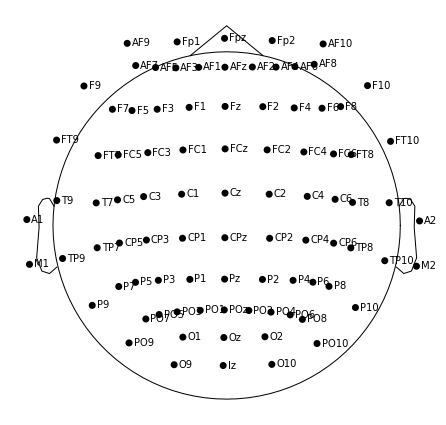

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


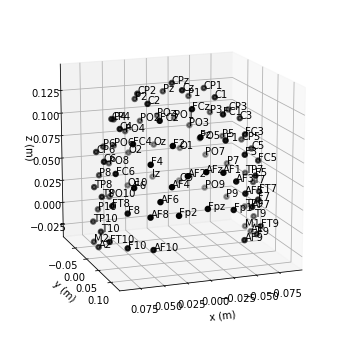

In [27]:
s1020 = mne.channels.make_standard_montage('standard_1020')
print(s1020)

s1020.plot()  # 2D
fig = s1020.plot(kind='3d', show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

{'F3': array([-0.04908182,  0.06114545,  0.04584545]), 'F4': array([0.04908182, 0.06114545, 0.04584545]), 'O1': array([-0.02809091, -0.08646364,  0.        ]), 'O2': array([ 0.02809091, -0.08646364,  0.        ]), 'F7': array([-0.07354545,  0.05343636,  0.        ]), 'F8': array([0.07354545, 0.05343636, 0.        ]), 'T7': array([-0.09090909,  0.        ,  0.        ]), 'T8': array([0.09090909, 0.        , 0.        ]), 'P7': array([-7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'P8': array([ 7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'FC5': array([-0.07917273,  0.03066364,  0.03226364]), 'FC6': array([0.07917273, 0.03066364, 0.03226364]), 'AF3': array([-0.03636364,  0.08181818,  0.03909091]), 'AF4': array([0.03636364, 0.08181818, 0.03909091])}


<ipython-input-28-ccc486ea64a6>:8: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  montage.plot()


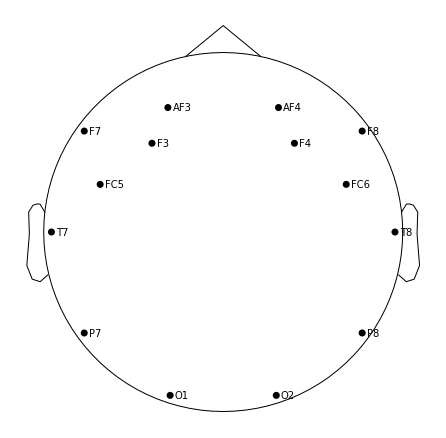

<ipython-input-28-ccc486ea64a6>:9: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  fig = montage.plot(kind='3d', show=False)  # 3D


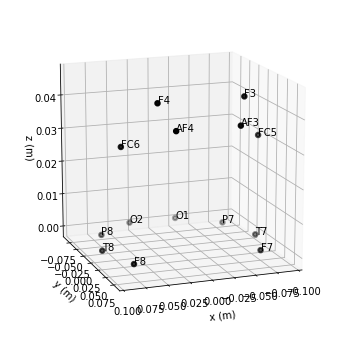

In [28]:

df = pd.read_csv('/content/drive/MyDrive/Bath/Dissertation/Analysis/channels_positional_Emotiv14.txt')
ch_names = df.name.to_list()

pos = df[['x','y','z']].values/11 # Scale down to size
dig_ch_pos = dict(zip(ch_names,pos))
print(dig_ch_pos)
montage = mne.channels.make_dig_montage(ch_pos=dig_ch_pos)
montage.plot()
fig = montage.plot(kind='3d', show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [29]:
stimuli

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
0        20.000000      0  4234.743652  4246.922852  4251.922852  4288.974121   
1        20.003906      0  4252.436035  4290.384766  4227.051270  4243.077148   
2        20.007812      0  4212.692383  4242.307617  4236.282227  4232.820313   
3        20.011719      0  4236.794922  4228.974121  4252.820313  4179.743652   
4        20.015625      0  4252.820313  4198.589844  4273.974121  4225.769043   
...            ...    ...          ...          ...          ...          ...   
66555  4482.980469    129  4232.179688  4216.025879  4107.179688  5332.307617   
66556  4482.984375    129  4122.692383  5334.487305  4256.025879  4217.948730   
66557  4482.988281    129  4256.025879  4218.589844  4208.205078  4207.692383   
66558  4482.992188    129  4206.410156  4221.282227  4119.743652  4244.487305   
66559  4482.996094    129  4122.179688  4246.922852  4222.948730  4182.948730   

                T7           P7           O1           O2  ...           T8  \
0      4240.384766  4239.871582  4229.743652  4228.205078  ...  4225.000000   
1      4234.487305  4233.333496  4257.307617  4218.846191  ...  4233.974121   
2      4256.538574  4195.128418  4272.436035  4232.436035  ...  4255.641113   
3      4274.615234  4228.717773  4246.153809  4258.077148  ...  4236.922852   
4      4242.563965  4258.461426  4237.307617  4235.769043  ...  4278.846191   
...            ...          ...          ...          ...  ...          ...   
66555  4254.358887  4214.230957  4205.000000  4226.153809  ...  4242.307617   
66556  4207.051270  4207.436035  4112.307617  4242.563965  ...  4176.282227   
66557  4116.025879  4243.077148  4221.282227  4178.205078  ...  4190.512695   
66558  4222.692383  4180.641113  4232.436035  4191.282227  ...  4221.410156   
66559  4235.000000  4195.897461  4241.282227  4220.641113  ...  5328.205078   

                F8          AF4          FC6           F4   Channel 15  \
0      4263.846191  4232.563965  4225.769043  4248.077148  4238.717773   
1      4235.641113  4252.051270  4239.871582  4245.641113  4249.615234   
2      4238.205078  4240.897461  4246.410156  4282.307617  4208.333496   
3      4245.512695  4278.717773  4216.282227  4237.948730  4239.358887   
4      4228.974121  4239.615234  4244.871582  4227.563965  4259.615234   
...            ...          ...          ...          ...          ...   
66555  4215.384766  4175.384766  4224.230957  4196.538574  4233.974121   
66556  4226.282227  4193.205078  4236.794922  4220.641113  4138.333496   
66557  4239.102539  4221.666504  4146.922852  5336.410156  4254.102539   
66558  4146.922852  5333.589844  4251.794922  4208.974121  4202.820313   
66559  4251.025879  4204.871582  4200.000000  4245.641113  4122.948730   

        Channel 16  Label Mode of Stimulus    Stage  
0      4248.333496   Lamp            audio  stimuli  
1      4287.436035   Lamp            audio  stimuli  
2      4239.358887   Lamp            audio  stimuli  
3      4226.153809   Lamp            audio  stimuli  
4      4252.436035   Lamp            audio  stimuli  
...            ...    ...              ...      ...  
66555  4218.461426  Clock             text  stimuli  
66556  5336.538574  Clock             text  stimuli  
66557  4214.871582  Clock             text  stimuli  
66558  4236.794922  Clock             text  stimuli  
66559  4249.230957  Clock             text  stimuli  

[66560 rows x 21 columns]

In [30]:
speaking

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
0        23.000000      0  4111.538574  4232.948730  4218.717773  4237.948730   
1        23.003906      0  4226.025879  4236.538574  4243.589844  4228.717773   
2        23.007812      0  4247.948730  4230.897461  4240.128418  4240.256348   
3        23.011719      0  4249.743652  4271.282227  4243.974121  4212.436035   
4        23.015625      0  4251.922852  4218.461426  4234.871582  4247.307617   
...            ...    ...          ...          ...          ...          ...   
66555  4503.980469    129  4298.077148  4299.871582  4241.410156  4241.794922   
66556  4503.984375    129  4243.717773  4242.051270  4232.179688  4238.589844   
66557  4503.988281    129  4232.307617  4238.333496  4238.077148  4255.384766   
66558  4503.992188    129  4230.769043  4254.230957  4218.461426  4243.205078   
66559  4503.996094    129  4221.794922  4247.692383  4332.563965  4240.128418   

                T7           P7           O1           O2  ...           F8  \
0      4243.717773  4230.641113  4230.384766  4173.077148  ...  4225.000000   
1      4232.436035  4200.512695  4238.077148  4205.897461  ...  4237.563965   
2      4238.846191  4207.692383  4222.307617  4234.487305  ...  4104.487305   
3      4227.051270  4239.871582  4248.333496  4251.025879  ...  4258.846191   
4      4252.948730  4256.282227  4117.820313  4248.974121  ...  4265.128418   
...            ...          ...          ...          ...  ...          ...   
66555  4231.922852  4237.563965  4242.563965  4256.410156  ...  4339.615234   
66556  4242.948730  4256.794922  4218.589844  4244.358887  ...  4225.384766   
66557  4217.948730  4242.692383  4334.743652  4249.615234  ...  4293.717773   
66558  4332.563965  4244.230957  4218.589844  4271.922852  ...  4242.563965   
66559  4215.641113  4271.025879  4289.871582  4296.538574  ...  4233.589844   

               AF4          FC6           F4   Channel 15   Channel 16  Label  \
0      4238.461426  4236.410156  4243.077148  4103.846191  4229.871582   Lamp   
1      4242.692383  4101.282227  4230.384766  4238.717773  4239.487305   Lamp   
2      4235.512695  4251.410156  4246.282227  4255.256348  4236.794922   Lamp   
3      4253.974121  4262.051270  4243.461426  4256.025879  4276.922852   Lamp   
4      4246.922852  4255.897461  4254.487305  4259.358887  4224.102539   Lamp   
...            ...          ...          ...          ...          ...    ...   
66555  4260.128418  4226.025879  4289.615234  4300.897461  4301.794922  Clock   
66556  4285.128418  4298.717773  4300.641113  4244.358887  4240.897461  Clock   
66557  4297.948730  4243.846191  4239.743652  4232.820313  4237.563965  Clock   
66558  4239.743652  4233.461426  4236.922852  4225.512695  4255.384766  Clock   
66559  4236.794922  4225.128418  4258.846191  4227.436035  4256.025879  Clock   

       Mode of Stimulus       Stage Time Index  
0                 audio   speaking1          1  
1                 audio   speaking1          2  
2                 audio   speaking1          3  
3                 audio   speaking1          4  
4                 audio   speaking1          5  
...                 ...         ...        ...  
66555              text  speaking10        508  
66556              text  speaking10        509  
66557              text  speaking10        510  
66558              text  speaking10        511  
66559              text  speaking10        512  

[665600 rows x 22 columns]

# MNE work stimuli data

In [31]:
stimuli_mne = stimuli.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label'])

In [32]:
sfreq = 256
ch_names = list(stimuli_mne.columns)
print(ch_names)
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = 'eeg')
raw_stimuli = mne.io.RawArray(stimuli_mne[ch_names].transpose(), info)
raw_stimuli.set_montage(s1020)
raw_stimuli.info
#raw_stimuli.plot()
raw_stimuli

['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']
Creating RawArray with float64 data, n_channels=14, n_times=66560
    Range : 0 ... 66559 =      0.000 ...   259.996 secs
Ready.


<RawArray | 14 x 66560 (260.0 s), ~7.1 MB, data loaded>

In [33]:
audio_ind

array([ True, False, False, ..., False, False, False])

In [34]:
events_stimuli = mne.make_fixed_length_events(raw_stimuli, start=0, stop=4504, duration=2)
events_dict = {'Visual' : 1,
               'Audio' : 2,
               'Text' : 3,
               'None': 4}
events_stimuli.shape
events_stimuli[np.array(modes_of_stimuli_stimstage) == 'audio', 2] = np.array([2 for i in range((np.array(modes_of_stimuli_stimstage) == 'audio').sum())])
events_stimuli[np.array(modes_of_stimuli_stimstage) == 'text', 2] = np.array([3 for i in range((np.array(modes_of_stimuli_stimstage) == 'text').sum())])
events_stimuli[np.array(modes_of_stimuli_stimstage) == 'None', 2] = np.array([4 for i in range((np.array(modes_of_stimuli_stimstage) == 'None').sum())])
events_stimuli[:50]

array([[    0,     0,     2],
       [  512,     0,     1],
       [ 1024,     0,     1],
       [ 1536,     0,     2],
       [ 2048,     0,     3],
       [ 2560,     0,     3],
       [ 3072,     0,     4],
       [ 3584,     0,     3],
       [ 4096,     0,     2],
       [ 4608,     0,     1],
       [ 5120,     0,     3],
       [ 5632,     0,     3],
       [ 6144,     0,     3],
       [ 6656,     0,     1],
       [ 7168,     0,     1],
       [ 7680,     0,     1],
       [ 8192,     0,     4],
       [ 8704,     0,     1],
       [ 9216,     0,     1],
       [ 9728,     0,     2],
       [10240,     0,     1],
       [10752,     0,     2],
       [11264,     0,     1],
       [11776,     0,     1],
       [12288,     0,     3],
       [12800,     0,     3],
       [13312,     0,     2],
       [13824,     0,     4],
       [14336,     0,     2],
       [14848,     0,     1],
       [15360,     0,     2],
       [15872,     0,     2],
       [16384,     0,     3],
       [16

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 513 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 129 events and 513 original time points ...
Using matplotlib as 2D backend.
Using data from preloaded Raw for 10 events and 513 original time points ...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


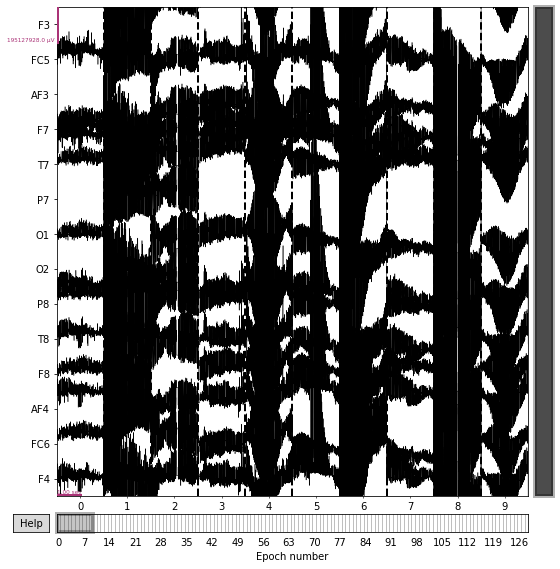

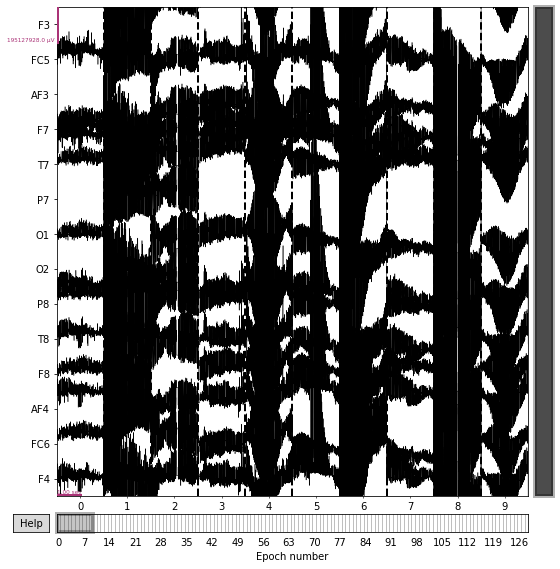

In [35]:
stimuli_epoched = mne.Epochs(raw_stimuli, tmin=0, tmax = 2, baseline=(0, 0), events = events_stimuli, event_id=events_dict)
stimuli_epoched.plot(events = events_stimuli, n_epochs=10, scalings = 'auto')

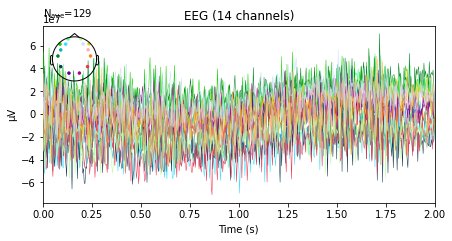

In [36]:
ER_all = stimuli_epoched.average()
fig2 = ER_all.plot(spatial_colors=True)

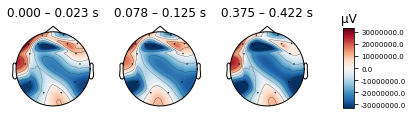

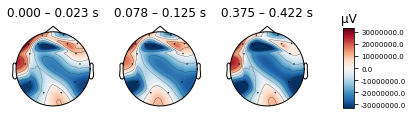

In [37]:
ER_all.plot_topomap(times=[0, 0.1, 0.4], average=0.05)

No projector specified for this dataset. Please consider the method self.add_proj.


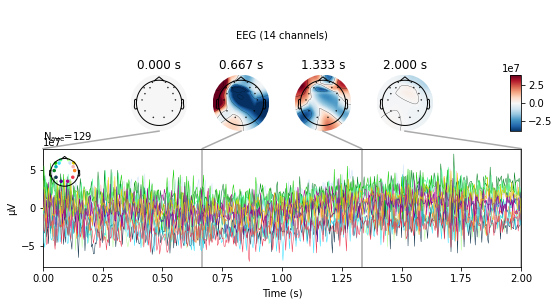

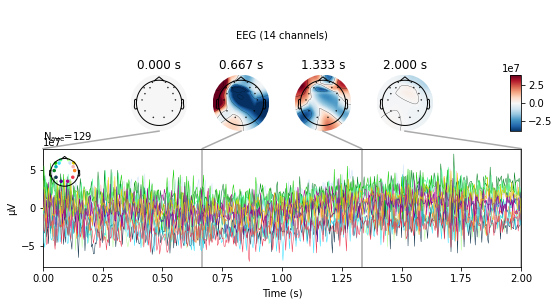

In [38]:
ER_all.plot_joint(times='auto')

In [39]:
average_aud = stimuli_epoched['Audio'].average()
average_text = stimuli_epoched['Text'].average()
average_viz = stimuli_epoched['Visual'].average()


No projector specified for this dataset. Please consider the method self.add_proj.


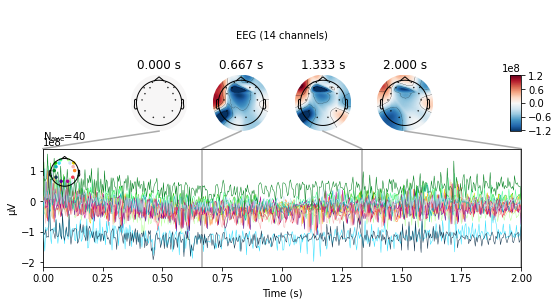

No projector specified for this dataset. Please consider the method self.add_proj.


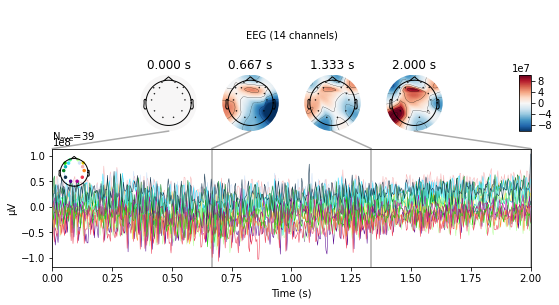

No projector specified for this dataset. Please consider the method self.add_proj.


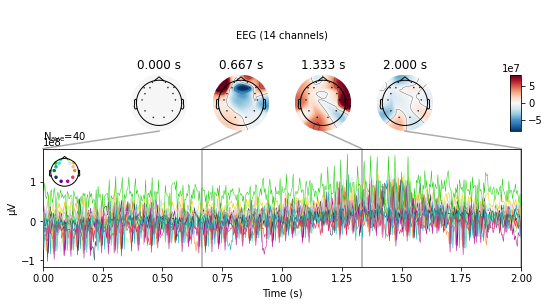

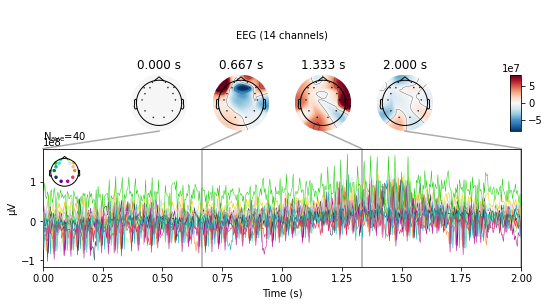

In [40]:
average_aud.plot_joint(times='auto')
average_text.plot_joint(times='auto')
average_viz.plot_joint(times='auto')

In [41]:
occipital = ['O1', 'O2']
temporal = ['T7', 'T8']
broca = ['F7']
ch_names


['F3',
 'FC5',
 'AF3',
 'F7',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'F8',
 'AF4',
 'FC6',
 'F4']

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


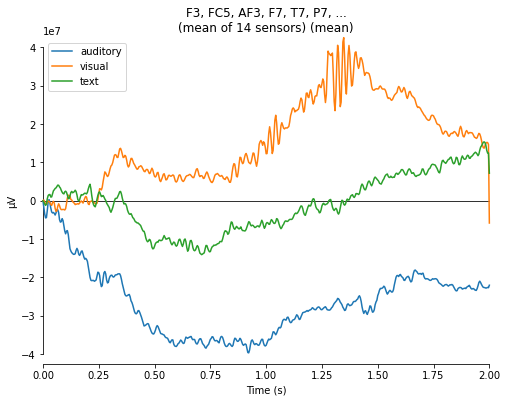

[<Figure size 576x432 with 1 Axes>]

In [42]:
evokeds = dict(auditory=average_aud, visual=average_viz, text=average_text)
picks = [ch_names[n] for n in range(0, 14)]
mne.viz.plot_compare_evokeds(evokeds, picks, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


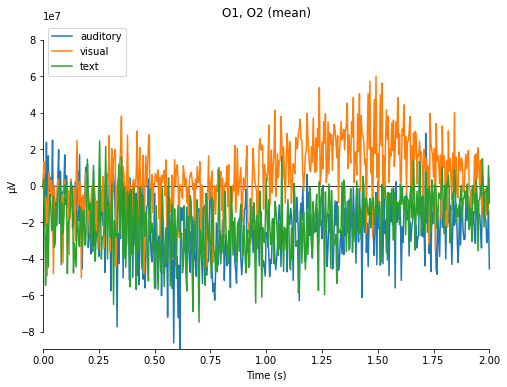

[<Figure size 576x432 with 1 Axes>]

In [43]:
mne.viz.plot_compare_evokeds(evokeds, picks = occipital, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


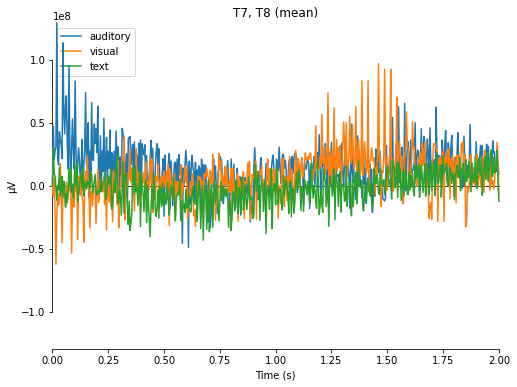

[<Figure size 576x432 with 1 Axes>]

In [44]:
mne.viz.plot_compare_evokeds(evokeds, picks = temporal, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-45-583b0f28e5a5>:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks = broca, combine='mean')


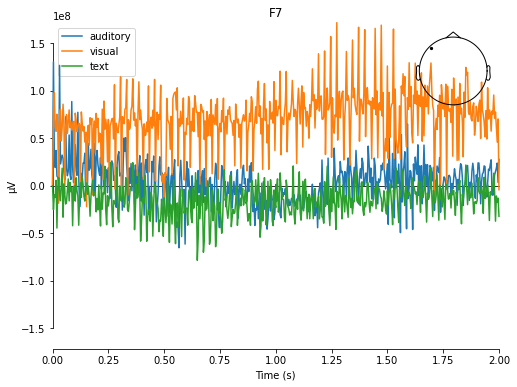

[<Figure size 576x432 with 2 Axes>]

In [45]:
mne.viz.plot_compare_evokeds(evokeds, picks = broca, combine='mean')

# MNE work speaking data

In [46]:
speaking_mne = speaking.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label', 'Time Index'])

In [47]:
sfreq = 256
ch_names = list(speaking_mne.columns)
print(ch_names)
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = 'eeg')
raw_speaking = mne.io.RawArray(speaking_mne[ch_names].transpose(), info)
raw_speaking.set_montage(s1020)
raw_speaking.info
#raw_stimuli.plot()
raw_speaking

['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']
Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


<RawArray | 14 x 665600 (2600.0 s), ~71.1 MB, data loaded>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


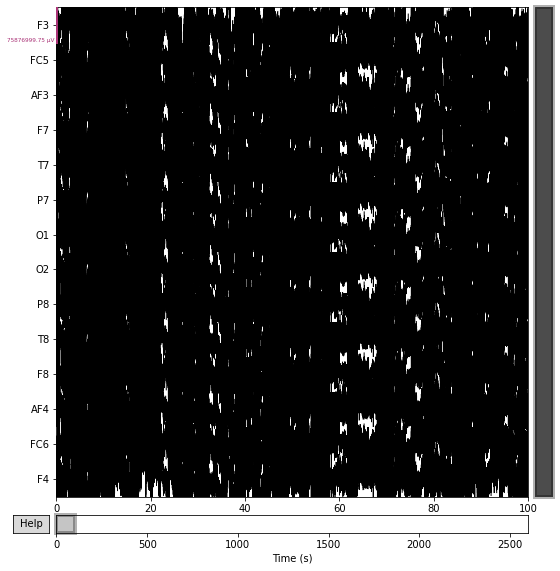

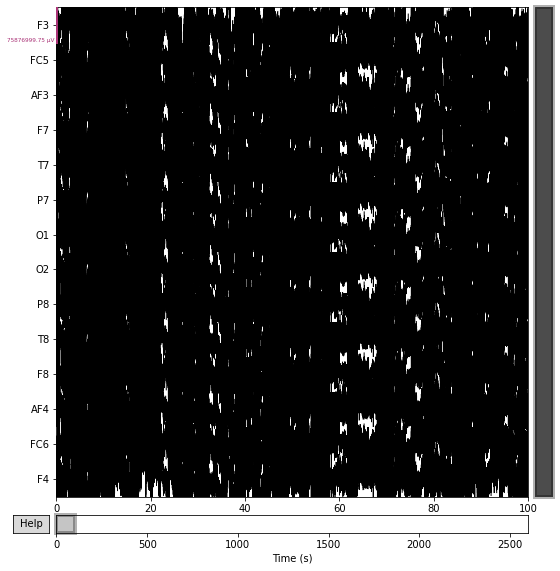

In [48]:
#raw.plot_psd(fmax=128)
raw_speaking.plot(duration=100, n_channels=14, scalings = 'auto')

In [49]:
ssp_projectors = raw_speaking.info['projs']
print(ssp_projectors)
raw_speaking.del_proj()

[]


<RawArray | 14 x 665600 (2600.0 s), ~71.1 MB, data loaded>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


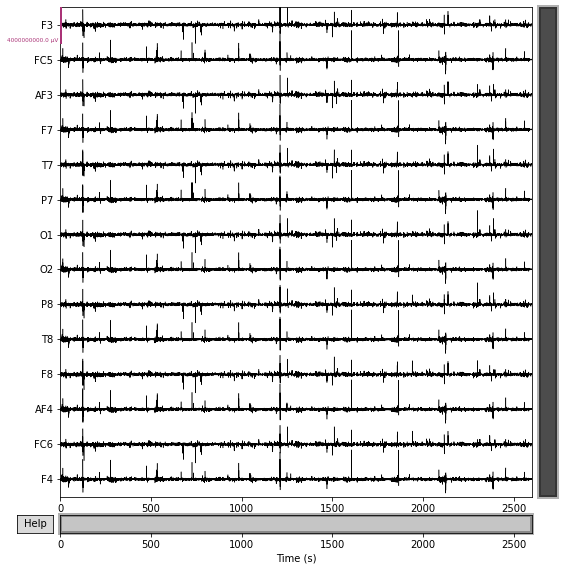

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


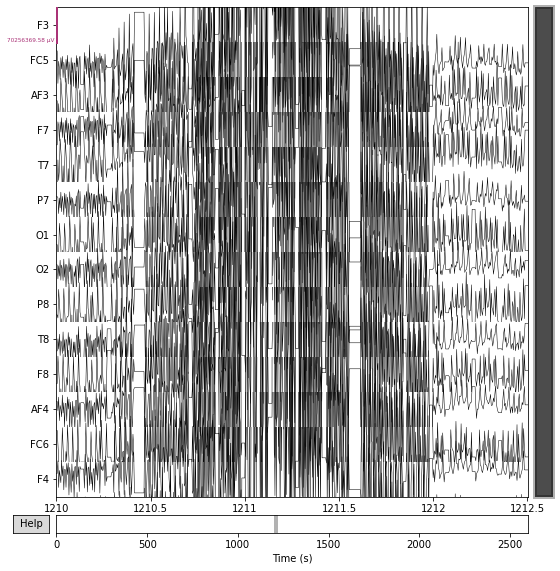

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


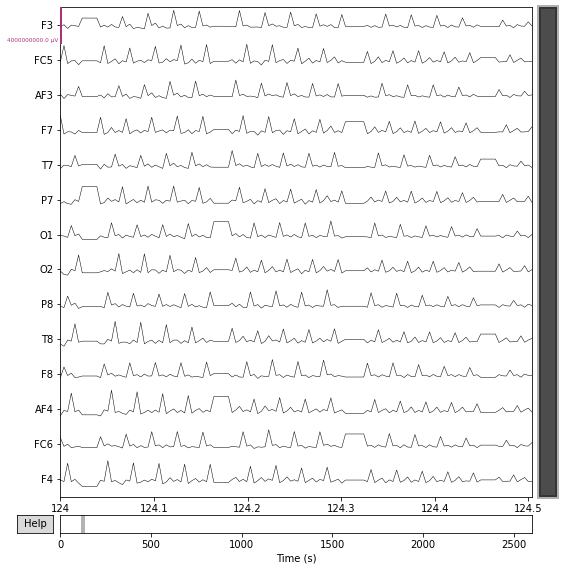

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


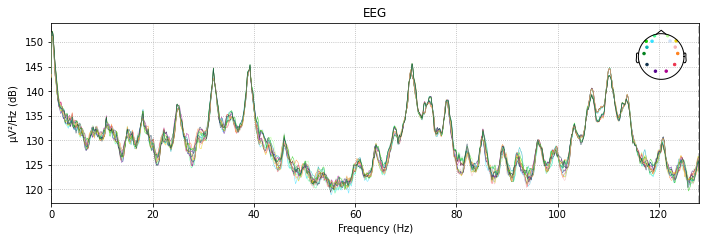

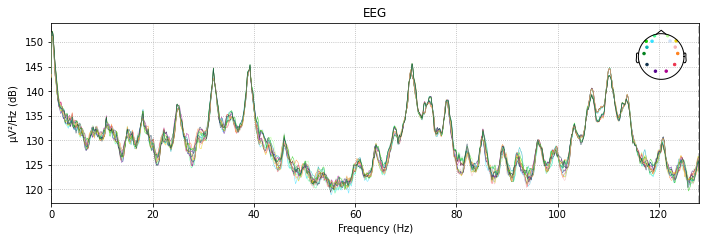

In [50]:
raw_speaking.plot(start = 0, duration = 3000, scalings = 2000)
raw_speaking.plot(start = 1210, duration = 2.50, scalings = 'auto')
raw_speaking.plot(start = 124, duration = 0.5, scalings = 2000)
raw_speaking.plot_psd(fmax=128)


Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


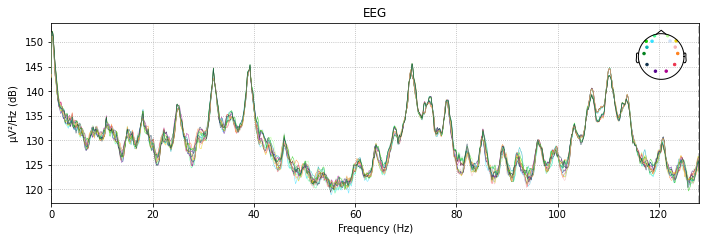

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 110.00 Hz
- Upper transition bandwidth: 18.00 Hz (-6 dB cutoff frequency: 119.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Setting up band-stop filter from 70 - 78 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 70.25 Hz)
- Upper passband edge: 77.50 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 77.75 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


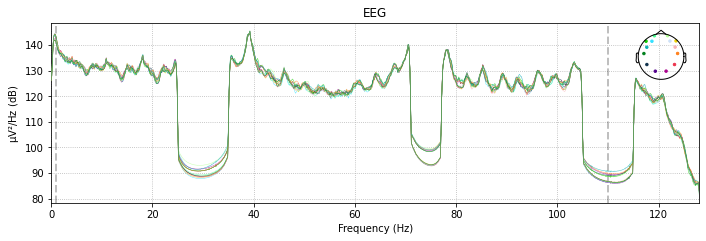

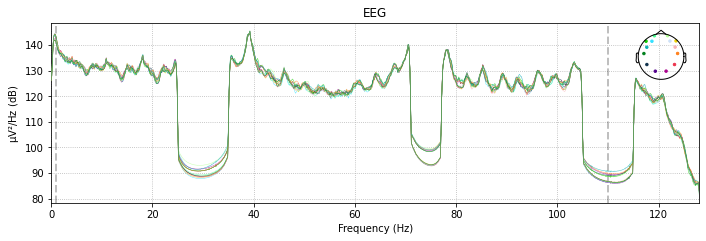

In [51]:
# High pass, Low pass filtering

raw_speaking.plot_psd(fmax=128)

low_cut = 1
hi_cut  = 110
freqs = (74, 110)

raw_speaking_filt = raw_speaking.copy().filter(l_freq=low_cut, h_freq=hi_cut)
raw_speaking_filt = raw_speaking_filt.copy().notch_filter(freqs =74, notch_widths = 6).notch_filter(freqs =(30, 110), notch_widths = 10)
raw_speaking_filt.plot_psd(fmax=128)


In [52]:
# average_ecg = create_ecg_epochs(raw_speaking).average()
# print('We found %i ECG events' % average_ecg.nave)
# joint_kwargs = dict(ts_args=dict(time_unit='s'),
#                     topomap_args=dict(time_unit='s'))
# average_ecg.plot_joint(**joint_kwargs)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 14 components
Fitting ICA took 21.3s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1300 matching events found
No baseline correction applied
0 projection items activated


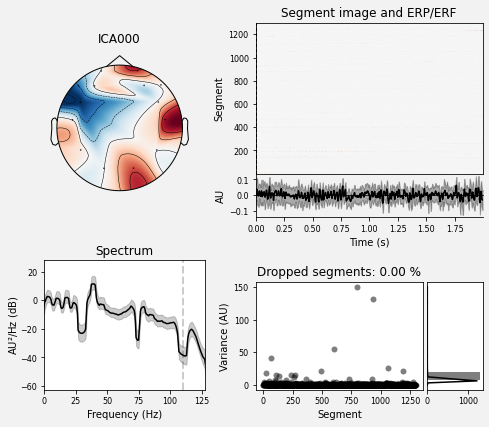

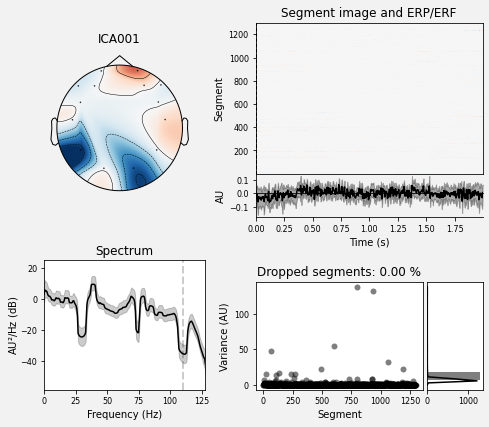

Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


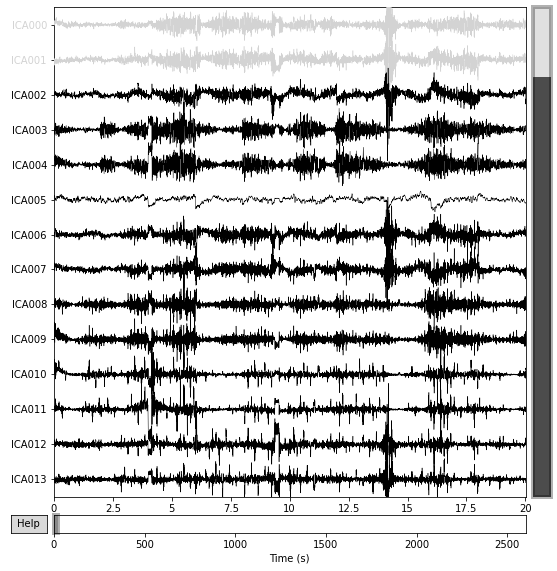

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components


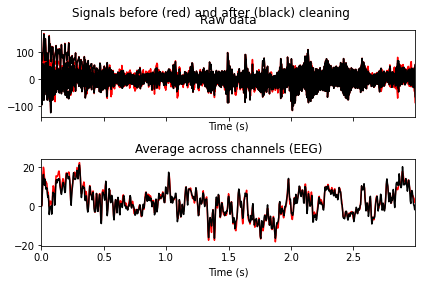

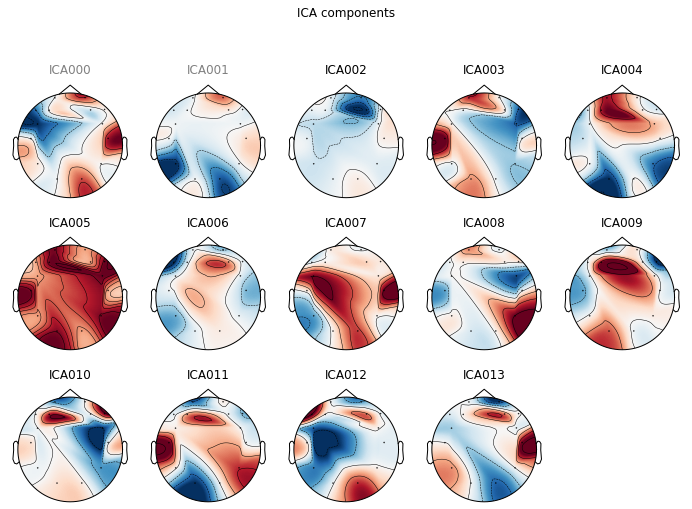

[<MNEFigure size 702x526.68 with 14 Axes>]

In [53]:
ica = mne.preprocessing.ICA(max_iter=800)
ica.fit(raw_speaking_filt)
ica.exclude = [0, 1]  # details on how we picked these are omitted here
ica.plot_properties(raw_speaking_filt, picks=ica.exclude)
ica.plot_sources(raw_speaking_filt)
ica.plot_overlay(raw_speaking_filt, exclude = ica.exclude)
ica.plot_components()
#help(ica)

In [54]:
speaking_processed_mne = raw_speaking.copy()
ica.apply(speaking_processed_mne)

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components


<RawArray | 14 x 665600 (2600.0 s), ~71.1 MB, data loaded>

In [55]:
speaking_processed_mne

<RawArray | 14 x 665600 (2600.0 s), ~71.1 MB, data loaded>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


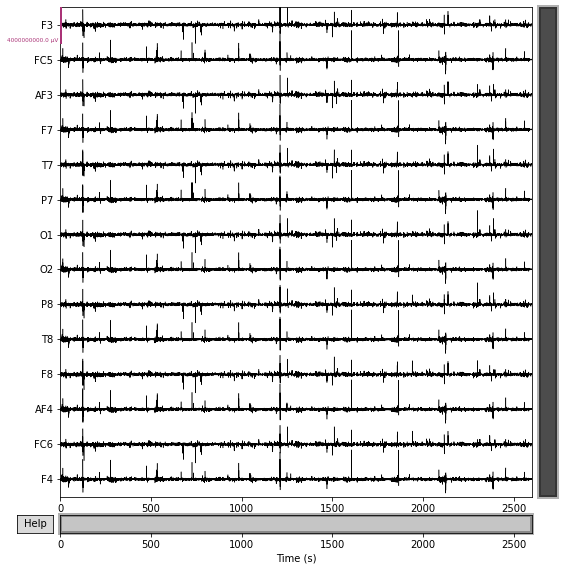

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


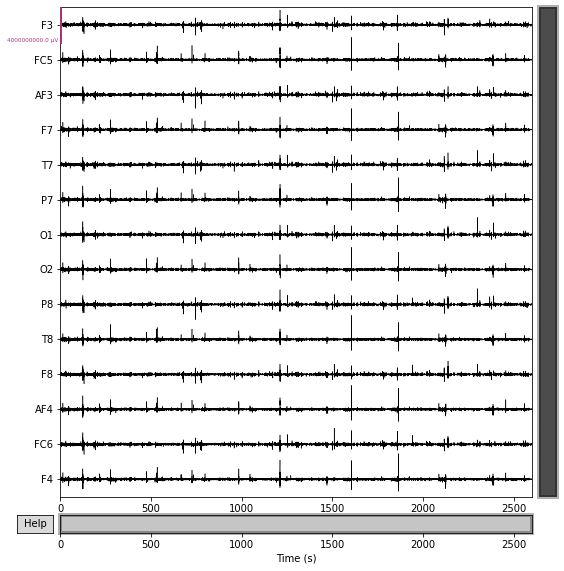

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


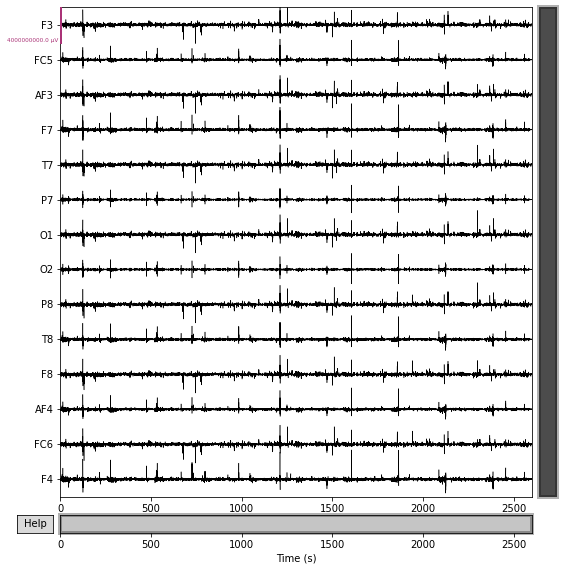

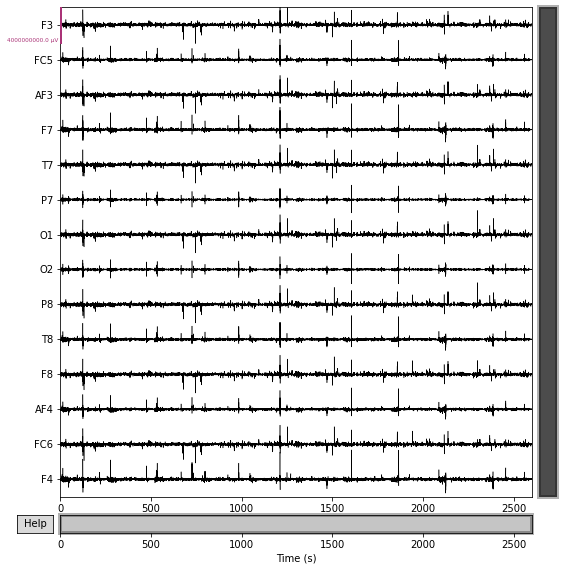

In [56]:
raw_speaking.plot(duration = 3000, scalings = 2000)
raw_speaking_filt.plot(duration = 3000, scalings = 2000)
speaking_processed_mne.plot(duration = 3000, scalings = 2000)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


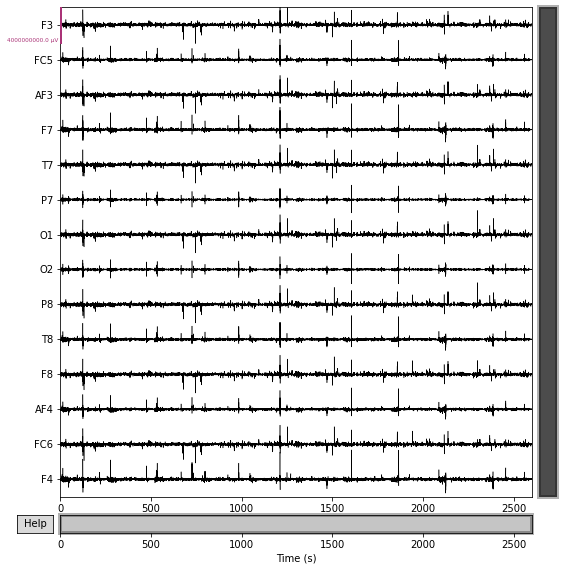

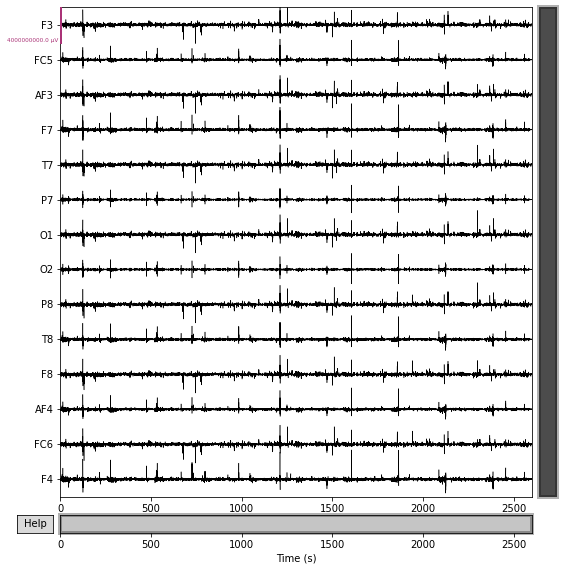

In [57]:
speaking_processed_mne.plot(duration = 3000, scalings = 2000)

In [58]:
speaking

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
0        23.000000      0  4111.538574  4232.948730  4218.717773  4237.948730   
1        23.003906      0  4226.025879  4236.538574  4243.589844  4228.717773   
2        23.007812      0  4247.948730  4230.897461  4240.128418  4240.256348   
3        23.011719      0  4249.743652  4271.282227  4243.974121  4212.436035   
4        23.015625      0  4251.922852  4218.461426  4234.871582  4247.307617   
...            ...    ...          ...          ...          ...          ...   
66555  4503.980469    129  4298.077148  4299.871582  4241.410156  4241.794922   
66556  4503.984375    129  4243.717773  4242.051270  4232.179688  4238.589844   
66557  4503.988281    129  4232.307617  4238.333496  4238.077148  4255.384766   
66558  4503.992188    129  4230.769043  4254.230957  4218.461426  4243.205078   
66559  4503.996094    129  4221.794922  4247.692383  4332.563965  4240.128418   

                T7           P7           O1           O2  ...           F8  \
0      4243.717773  4230.641113  4230.384766  4173.077148  ...  4225.000000   
1      4232.436035  4200.512695  4238.077148  4205.897461  ...  4237.563965   
2      4238.846191  4207.692383  4222.307617  4234.487305  ...  4104.487305   
3      4227.051270  4239.871582  4248.333496  4251.025879  ...  4258.846191   
4      4252.948730  4256.282227  4117.820313  4248.974121  ...  4265.128418   
...            ...          ...          ...          ...  ...          ...   
66555  4231.922852  4237.563965  4242.563965  4256.410156  ...  4339.615234   
66556  4242.948730  4256.794922  4218.589844  4244.358887  ...  4225.384766   
66557  4217.948730  4242.692383  4334.743652  4249.615234  ...  4293.717773   
66558  4332.563965  4244.230957  4218.589844  4271.922852  ...  4242.563965   
66559  4215.641113  4271.025879  4289.871582  4296.538574  ...  4233.589844   

               AF4          FC6           F4   Channel 15   Channel 16  Label  \
0      4238.461426  4236.410156  4243.077148  4103.846191  4229.871582   Lamp   
1      4242.692383  4101.282227  4230.384766  4238.717773  4239.487305   Lamp   
2      4235.512695  4251.410156  4246.282227  4255.256348  4236.794922   Lamp   
3      4253.974121  4262.051270  4243.461426  4256.025879  4276.922852   Lamp   
4      4246.922852  4255.897461  4254.487305  4259.358887  4224.102539   Lamp   
...            ...          ...          ...          ...          ...    ...   
66555  4260.128418  4226.025879  4289.615234  4300.897461  4301.794922  Clock   
66556  4285.128418  4298.717773  4300.641113  4244.358887  4240.897461  Clock   
66557  4297.948730  4243.846191  4239.743652  4232.820313  4237.563965  Clock   
66558  4239.743652  4233.461426  4236.922852  4225.512695  4255.384766  Clock   
66559  4236.794922  4225.128418  4258.846191  4227.436035  4256.025879  Clock   

       Mode of Stimulus       Stage Time Index  
0                 audio   speaking1          1  
1                 audio   speaking1          2  
2                 audio   speaking1          3  
3                 audio   speaking1          4  
4                 audio   speaking1          5  
...                 ...         ...        ...  
66555              text  speaking10        508  
66556              text  speaking10        509  
66557              text  speaking10        510  
66558              text  speaking10        511  
66559              text  speaking10        512  

[665600 rows x 22 columns]

In [59]:
events_speaking = mne.make_fixed_length_events(raw_speaking_filt, start=0, stop=4504, duration=2)
events_dict = {'Visual' : 1,
               'Audio' : 2,
               'Text' : 3,
               'None': 4}
events_speaking.shape
events_speaking[np.array(modes_of_stimuli) == 'audio', 2] = np.array([2 for i in range((np.array(modes_of_stimuli) == 'audio').sum())])
events_speaking[np.array(modes_of_stimuli) == 'text', 2] = np.array([3 for i in range((np.array(modes_of_stimuli) == 'text').sum())])
events_speaking[np.array(modes_of_stimuli) == 'None', 2] = np.array([4 for i in range((np.array(modes_of_stimuli) == 'None').sum())])
#events_stimuli[:50]


Not setting metadata
1300 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1300 events and 513 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 1299 events and 513 original time points ...
Using data from preloaded Raw for 10 events and 513 original time points ...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


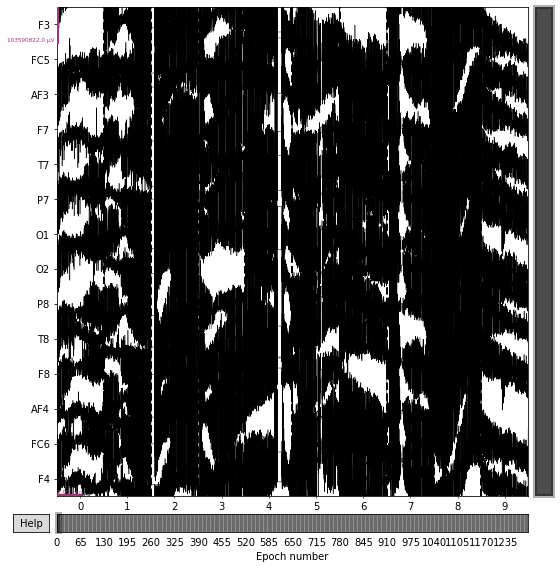

No projector specified for this dataset. Please consider the method self.add_proj.


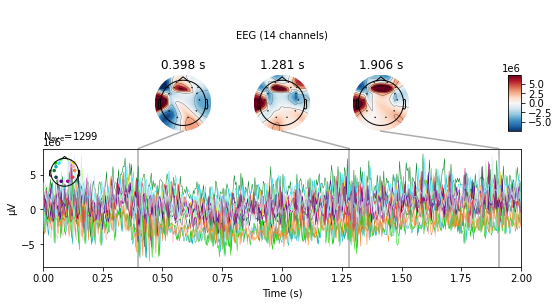

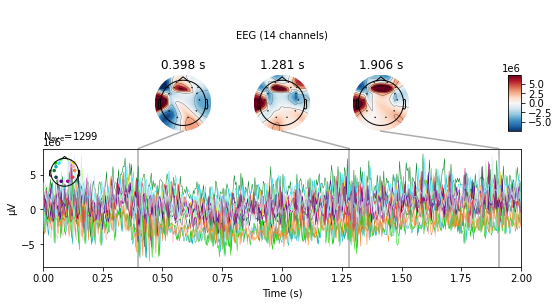

In [60]:

speaking_epoched = mne.Epochs(raw_speaking, tmin=0, tmax = 2, baseline=(0, 0), events = events_speaking, event_id=events_dict)
speaking_epoched.plot(events = events_speaking, n_epochs=10, scalings = 'auto')
speaking_epoched.average().plot_joint()

In [61]:
speaking_processed = speaking_processed_mne.to_data_frame().drop(columns = ['time']).to_numpy().reshape(speaking.shape[0] // (512), 512 * 14)


In [62]:
speaking_processed

array([[4.04524920e+09, 4.54992313e+09, 4.14433782e+09, ...,
        4.90846719e+09, 4.23200796e+09, 4.52558750e+09],
       [4.16939646e+09, 4.55645714e+09, 4.15701055e+09, ...,
        4.89865591e+09, 4.10489249e+09, 4.50823740e+09],
       [4.10965058e+09, 4.48589866e+09, 4.43177298e+09, ...,
        5.02040621e+09, 4.17382125e+09, 4.48529187e+09],
       ...,
       [4.17715181e+09, 4.58978371e+09, 4.17461110e+09, ...,
        4.96222260e+09, 4.17852761e+09, 4.53109969e+09],
       [4.24060760e+09, 4.55807484e+09, 4.16269194e+09, ...,
        4.92886355e+09, 4.19697080e+09, 4.53155515e+09],
       [4.15517732e+09, 4.57180411e+09, 4.15012204e+09, ...,
        4.94340430e+09, 4.14152280e+09, 4.52340762e+09]])

In [63]:
speaking_processed.shape

(1300, 7168)

# Feature extraction

In [64]:
X_train, X_test, y_train, y_test = train_test_split(speaking_processed, targets)

In [65]:
stimuli_audio_ind = np.array(modes_of_stimuli_stimstage) == 'audio'
stimuli_audio_feat = stimuli_features[stimuli_audio_ind]
stimuli_audio_targ = stimuli_targets[stimuli_audio_ind]

stimuli_text_ind = np.array(modes_of_stimuli_stimstage) == 'text'
stimuli_text_feat = stimuli_features[stimuli_text_ind]
stimuli_text_targ = stimuli_targets[stimuli_text_ind]

stimuli_image_ind = np.array(modes_of_stimuli_stimstage) == 'image'
stimuli_image_feat = stimuli_features[stimuli_image_ind]
stimuli_image_targ = stimuli_targets[stimuli_image_ind]

In [66]:
X_train.shape

(975, 7168)

In [67]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train[:, None])
y_train_IE = np.argmax(y_train, axis = 1)
y_test = np.argmax(onehot_encoder.transform(y_test[:, None]), axis = 1)
#X_train = X_train.reshape(X_train.shape[0], 299 *299 * 3)
#X_test = X_test.reshape(X_test.shape[0], 299 *299 * 3)
print(X_train.shape, X_test.shape, y_train.shape, y_train_IE.shape, y_test.shape)


(975, 7168) (325, 7168) (975, 5) (975,) (325,)


In [68]:
pca = PCA(0.999)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
print(X_train.shape, X_test.shape, X_train_PCA.shape, X_test_PCA.shape)

(975, 7168) (325, 7168) (975, 895) (325, 895)


# Application of ML models

In [69]:
# ANN
# Simple DNN trained as a baseline for this problem...

In [ ]:
%%time
# Train a model to classify speech...
nEpoch_DNN = 500
nBatchSize_DNN=4

DNN_simple = Sequential()
DNN_simple.add(Dense(50, input_dim= X_train_PCA.shape[1]))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dropout(0.2))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(5, input_dim = 100, activation='sigmoid'))
DNN_simple.compile(loss='categorical_crossentropy', optimizer='Adam',  metrics=['accuracy'])
DNN_simple.summary()
print(X_train.shape, y_train.shape)
simple_DNN_training = DNN_simple.fit(X_train_PCA, y_train, epochs=nEpoch_DNN, batch_size=nBatchSize_DNN)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                44800     
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 5)                 505       
                                                                 
Total params: 70,605
Trainable params: 70,605
Non-traina

In [ ]:
#Generate predictions for the simple DNN
DNN_simple_pred = np.argmax(DNN_simple.predict(X_test_PCA), axis = 1)
DNN_simple_pred
print(DNN_simple_pred[:, None].shape, y_test.shape)

#Calculate prediction accuracy...
accuracy_score(y_test, DNN_simple_pred[:, None])

In [ ]:
plt.plot(simple_DNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_DNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

In [ ]:
confusion_mtx = confusion_matrix(y_test, DNN_simple_pred[:, None]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# # format data for input to the CNN...
X_train_CNN = X_train.reshape(X_train.shape[0], 512, 14, 1)
X_test_CNN = X_test.reshape(X_test.shape[0],512, 14, 1)
# #test_submit_set = np.array(test_submit_set).reshape(test_submit_set.shape[0], 28, 28, 1)

In [ ]:
%%time
nEpoch_CNN = 100
nBatchSize_CNN = 4

CNN_simple = Sequential()
#add model layers
CNN_simple.add(Conv2D(10, kernel_size=3, activation = 'relu', input_shape=(512, 14, 1)))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Flatten())
CNN_simple.add(Dropout(0.2))
CNN_simple.add(Dense(5, activation= 'softmax'))
CNN_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
CNN_simple.summary()
simple_CNN_training = CNN_simple.fit(X_train_CNN, y_train, epochs=nEpoch_CNN, batch_size=nBatchSize_CNN)

In [ ]:
CNN_simple_pred = np.argmax(CNN_simple.predict(X_test_CNN), axis = 1)
CNN_simple_pred
accuracy_score(y_test, CNN_simple_pred[:, None])

In [ ]:
plt.plot(simple_CNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_CNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

In [ ]:
confusion_mtx = confusion_matrix(y_test, CNN_simple_pred[:, None]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
RF_train = True

test_perf_RF = True
#simInData_train.shape,simInData_test.shape, simOutData_train.shape, simOutData_test.shape

if RF_train:
    RF_init= RandomForestClassifier(max_depth = 100, min_samples_leaf=10)
    RF_init.fit(X_train_PCA, y_train_IE)
    pickle.dump(RF_train, open(str('RF_init'), 'wb'))
else:
    RF_init = pickle.load(open(str('RF_init'), 'rb'))


In [ ]:
if test_perf_RF:
    RF_init_pred_train = (RF_init.predict(X_train_PCA))

    RF_init_pred_test = (RF_init.predict(X_test_PCA))

    #print(type(RF_toy_pred_test),simOutData_test.flatten())
    print(RF_init_pred_train.shape, y_train_IE.shape)
    print(RF_init_pred_train[0], y_train_IE[0])
    
    print(accuracy_score(RF_init_pred_train, y_train_IE))
    print(accuracy_score(RF_init_pred_test, y_test))
    confusion_mtx = confusion_matrix(y_test, RF_init_pred_test)
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:

# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
RF_grid = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf}
print(RF_grid)



In [ ]:
%%time
# RF_single = RandomForestRegressor()

# RF_single_random_search = RandomizedSearchCV(estimator = RF_single, param_distributions = RF_grid, n_iter = 50, cv = 5, verbose=2, n_jobs = -1)

# tune_start = time.clock()

# RF_single_random_search.fit(simInData_train, simOutData_train)

# tune_finish = time.clock()

# print('Total training time is ' + str(tune_finish  - tune_start) + ' seconds', RF_single_random_search.best_params_)
# RF_single_hps = RF_single_random_search.best_params_

RF_single = RandomForestClassifier()

RF_single_random_search = RandomizedSearchCV(estimator = RF_single, param_distributions = RF_grid, n_iter = 50, cv = 5, verbose=2, n_jobs = -1)



RF_single_random_search.fit(X_train_PCA, y_train_IE)


print(RF_single_random_search.best_params_)
RF_single_hps = RF_single_random_search.best_params_


In [ ]:
RF_single_hps

In [ ]:
(RF_single_random_search).cv_results_

In [ ]:
RF_single = RandomForestClassifier(n_estimators = RF_single_random_search.best_params_['n_estimators'],
                                  max_depth = RF_single_hps['max_depth'],
                                  min_samples_split = RF_single_hps['min_samples_split'],
                                  min_samples_leaf = RF_single_hps['min_samples_leaf'])
# t0 = time.clock()
RF_single.fit(X_train_PCA, y_train_IE)
# t1 = time.clock()
# print('Total training time is ' + str(t1 - t0) + ' seconds' + ', or ' + str(
#     float((t1 - t0) / 3600)) + f' hours, {X_train_PCA.shape[0]} training samples, {X_test_PCA.shape[0]} test samples')    
pickle.dump(RF_single, open(str('RF_toy_single'), 'wb'))

RF_single_pred_train = (RF_single.predict(X_train_PCA))

RF_single_pred_test = (RF_single.predict(X_test_PCA))

#print(type(RF_toy_pred_test),simOutData_test.flatten())
print(accuracy_score(RF_single_pred_train, y_train_IE))
print(accuracy_score(RF_single_pred_test, y_test))
confusion_mtx = confusion_matrix(y_test, RF_init_pred_test)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()